## ÖDEV-4
## Öğrenci No: 171024086
## Öğrenci Adı ve Soyadı: Berat KIZILARMUT
____________________________________________________________________________________________________________________________

### Ön hazırlık dosyasında verilen kodlar

In [1]:
# Kütüphane importlanması

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib notebook
from zplane import zplane

## OnCalismaOrnek7.pdf

In [2]:
z = np.array([0]) # a zero @z=0
p = np.array([1.0/4, 1.0/2]) # poles of the system
b, a = sig.zpk2tf(z, p, 1) # since there is no gain k=1
b,a

(array([1., 0.]), array([ 1.   , -0.75 ,  0.125]))

In [3]:
# alternative way to expand a product:
a = sig.convolve(np.array([1, -1/4]),np.array([1, -1/2]))
a

array([ 1.   , -0.75 ,  0.125])

In [4]:
# given the coeffs of numerator, i.e. b(z) and the coeffs of denominator a(z),
# we do the partial fraction expansion by:
r, p, k = sig.residuez(b,a) #
r,p,k
# to check the correctness of the polynomial roots (i.e. p's) we can use
poless = np.roots(a) # returns the polynomial coefficients of the denominator

## OnCalismaOrnek8.pdf

In [5]:
 num = np.array([1,0,0]) # we add zeros to match the size of num and
denum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum
n, x = sig.dimpulse((num, denum, 1),x0=0, n=10)
x

(array([[1.        ],
        [0.75      ],
        [0.4375    ],
        [0.234375  ],
        [0.12109375],
        [0.06152344],
        [0.03100586],
        [0.01556396],
        [0.00779724],
        [0.00390244]]),)

<IPython.core.display.Javascript object>


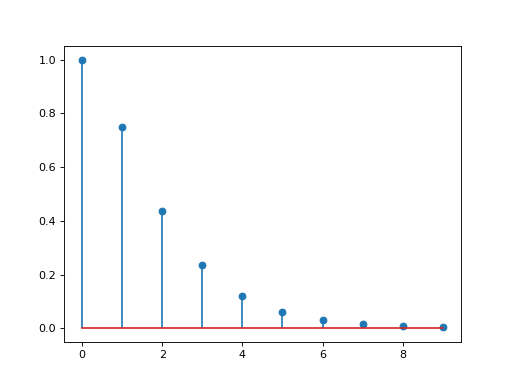

<StemContainer object of 3 artists>

In [6]:
plt.stem(n, np.squeeze(x))

## OnCalismaOrnek9.pdf

In [7]:
n = np.arange(0,10,1) # define the index vector for 10 points
xpf = -(1.0/4)**n + 2*(1.0/2)**n # result of Ornek-7
num = np.array([1, 0, 0]) # we add zeros to match the size of num an
denum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum
n1, xpse = sig.dimpulse((num, denum, 1),x0=0, n=10)
xpse = np.squeeze(xpse)

<IPython.core.display.Javascript object>


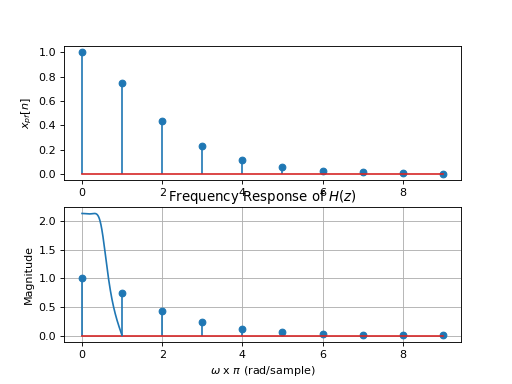

Text(0.5, 0, 'index vector (sample)')

In [8]:
plt.figure()
plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$')
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$')
plt.xlabel('index vector (sample)')

## OnCalismaOrnek10.pdf

In [9]:
zeros = np.array([-1]) # observe that the numerator can be defined as transf
poles = np.array([1j/2, -1j/2, 1.0/4])
w, H = sig.freqz_zpk(zeros, poles, 1)
plt.plot(w/np.pi, abs(H)) # plot the magnitude in logarithmic scale with blue
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude')
plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<IPython.core.display.Javascript object>


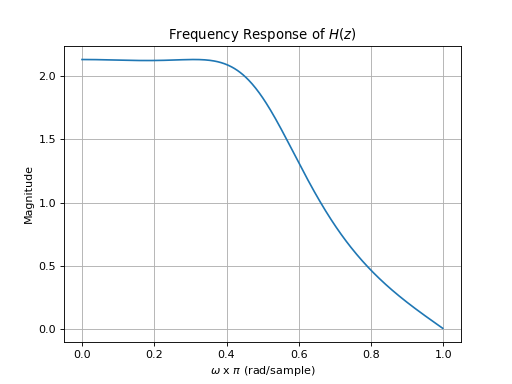

In [10]:
num, denum = sig.zpk2tf(zeros, poles, 1) # will return the coefficients b and a, r
w1, H_tf = sig.freqz(num, denum)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf)) # plot the magnitude in logarithmic scale with b
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<IPython.core.display.Javascript object>


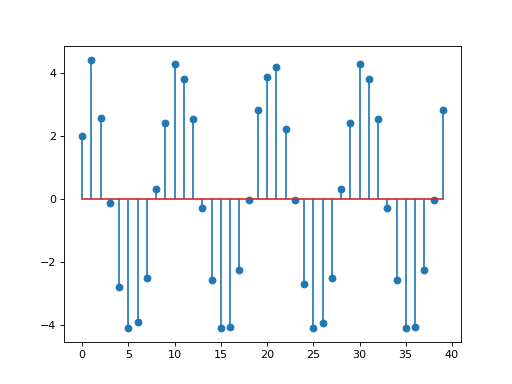

<StemContainer object of 3 artists>

In [11]:
n = np.arange(0, 40, 1) # define the index vector
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n) # define the input signal
yn = sig.lfilter(num, denum, xn)
plt.figure()
plt.stem(n, yn)

## OnCalismaOrnek11.pdf

<IPython.core.display.Javascript object>


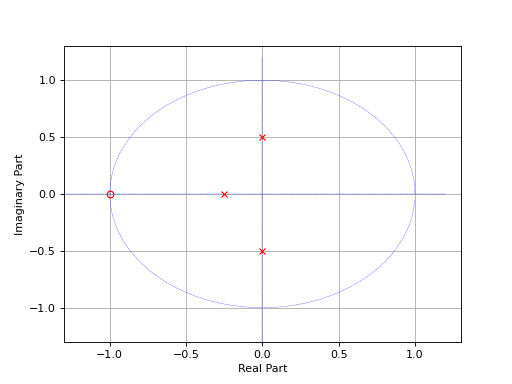

In [12]:
zeross = np.array([-1]) # the system has a single ze
poless = np.array([-1j/2, 1j/2, -1/4]) # the system has three poles
k = 1 # the system has unity gain
b, a = sig.zpk2tf(zeross,poless,k) # call the function that con
zplane(b,a) # call the function with coe

<IPython.core.display.Javascript object>


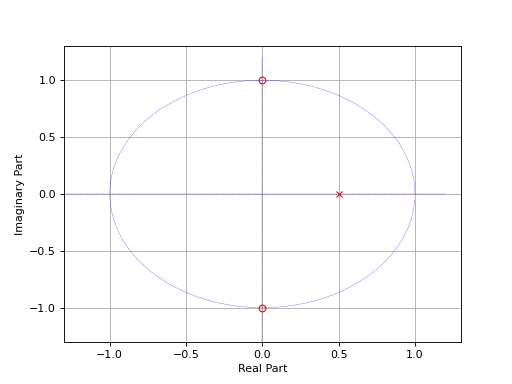

In [13]:
num = np.array([1, 0, 1]) # note that the coeff of z^(-1) term is zero.
denum = np.array([1, -1.0/2])
zplane(num, denum)

<IPython.core.display.Javascript object>


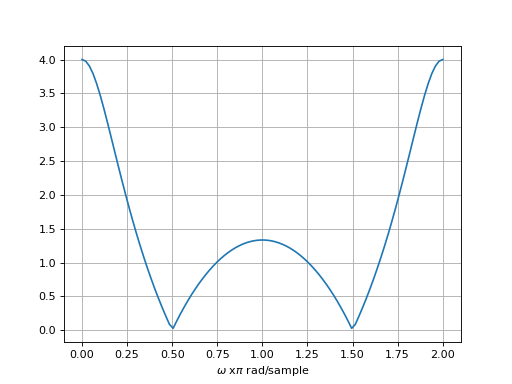

Text(0.5, 0, '$\\omega$ x$\\pi$ rad/sample')

In [14]:
 # Now, we define the frequency response as:
w = np.linspace(0, 2*np.pi, 100)
Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
# alternatively, we could use the sig.freqz_zpk() function to calculate the Frequen
# or sig.freqz() function to calculate from the coefficients.
Hw_abs = abs(Hw)
plt.figure()
plt.plot(w/np.pi, Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')

***

# Soru 1)

### $ y[n]=\frac{1}{2}y[n-1]-4y[n-2]+2y[n-3]+x[n]+\frac{2}{3}x[n-1]+\frac{1}{9}x[n-2] $

# a) H(z)

#### y[n] = 1/2 y[n-1] - 4 y[n-2] + 2 y[n-3] + x[n] + 2/3 x[n-1] + 1/9 x[n-2]

#### Y(z) = (1/2) z^-1 Y(z) - 4 z^-2 Y(z) + 2 z^-3 Y(z) + X(z) + (2/3) z^-1 X(z) + (1/9) z^-2 X(z)

#### Y(z) (1 - (z^-1)/2 + 4(z^-2) - 2(z^-3) ) = X(z) (1 + (2 z^-1)/3 + (z^-2)/9 )

## Y(z) / X(z) = H(z) = [1 + (2 $z^-$$^1$)/3 + ($z^-$$^2$)/9] **/** [1 - ($z^-$$^1$)/2 + 4($z^-$$^2$) - 2($z^-$$^3$)]

## $ H(z)=\frac{1+\frac{(2z^{-1})}{3}+\frac{(z^{-2})}{9}}{1-\frac{(z^{-1})}{2}+4(z^{-2})-2(z^{-3})} $

***

## b) Kutup ve Sıfır Diyagramı

### zplane(b,a) şeklinde tanımlanmış olan zplane.py dosyasında bulunan zplane fonksiyonu başlangıçta tanımlanmıştı

### H(z) bir transfer fonksiyonu formunda iken, paydanın üst kısmı B, alt kısmı A olmaktadır

<IPython.core.display.Javascript object>


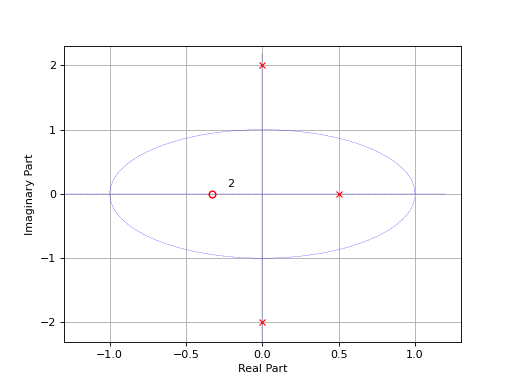

In [15]:
from zplane import zplane
A = [1, -1/2, 4, -2]
B = [1, 2/3, 1/9]
zplane(B,A)

***

## c) ROC Durumları

### c.1. h[n] = 0, n < 0

### Bu bilgilere dayanarak sinyalin sağ yanlı olduğunu anlarız.
### Sağ yanlı olduğu için ROC, 0=< Rr =< |z| olmaktadır
### Burada ROC, **|z| > 2** olmaktadır

***

### c.2. Sistemin Fourier Dönüşümü var ise

### Sistemin fourier dönüşümü olması için ROC'un birim çemberi içermesi gerekmektedir
### b) kısmındaki zplane grafiğine bakarsak kutuları içermeyen ve birim çemberi içeren aralık 0.5 < |z| < 2 olmaktadır
### Burada ROC, **0.5 < |z| <2**

***

## d) c.1 durumu için h[n], n = 0 to 30

### OnCalismaOrnek8.pdf ve 9'a dayanarak 
### Discrete impulse fonksiyonuna, B şıkkında bulunan B ve A katsayıları, 1 olan gain, 0 olan başlangıç koşulu
### ve 0 dan 30 a kadar 30 dahil, yani 31 eleman bilgileri girildi

<IPython.core.display.Javascript object>


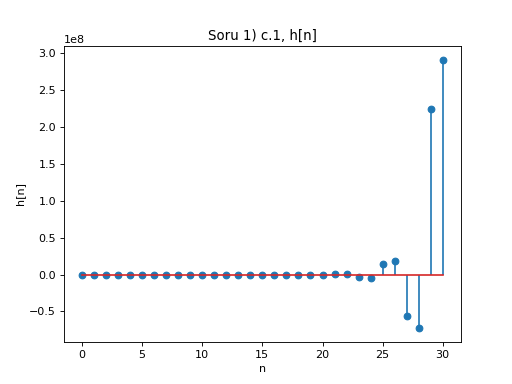

Text(0, 0.5, 'h[n]')

In [16]:
n, h = sig.dimpulse((B,A,1), x0=0, n=31)
h = np.squeeze(h)

# Grafik çizdirilmesi
plt.figure()
plt.stem(n, h, use_line_collection=True)
plt.title('Soru 1) c.1, h[n]')
plt.xlabel('n')
plt.ylabel('h[n]')

***

## e) Nedensellik ve kararlılık

### Bu sistem hem nedensel hem kararlı olamaz. 
### Bu iki durumun sağlanması için gereken ROC şartları kesişmemekte, bu iki olay aynı anda yaşanamamakta.
### Sistemin nedensel olması için sağ yanlı olması gereklidir, bu durum c.1. kısmında yapıldı
### Sistemin kararlı olması için ROC'ın birim çemberi kapsaması gerekmektedir, bu duru c.2. kısmında yapıldı
### Sistemi hem nedensel hem kararlı yapmak için B kısmındaki grafikte gözlemlediğimiz,
### 2j ve -2j deki kutuplardan kurtulmak gerekmektedir. 
### Bu kutuplardan kurtulduğumuzda ROC tek parçalı bir hale getirilebilir ve iki koşulda aynı anda sağlanabilir.


### Payda da bu kutuplaşmayı oluşturan değerleri bulmak için sisteme z değerine öncelikle 2j ve -2j verilir
### $ H\left(z\right)=\frac{---}{1-\frac{\left(2j\right)^{-1}}{2}+4\left(2j\right)^{-2}-2\left(2j\right)^{-3}} $ ve $ H\left(z\right)=\frac{---}{1-\frac{\left(-2j\right)^{-1}}{2}+4\left(-2j\right)^{-2}-2\left(-2j\right)^{-3}} $
### 2j değeri için $ \frac{\left(2j\right)^{-1}}{2} + -2\left(2j\right)^{-3} $ ikilisinin toplamı 0,
### $ 1+4\left(2j\right)^{-2} $ ikilisinin toplamı da 0 etmektedir.

### Burada bu ikili eşlerden birisini sistemden çıkardığımızda iki koşul da elde edilebilir.
### Bu sistemde $ 4\left(-2j\right)^{-2} + -2\left(2j\right)^{-3} $ ikilisinden kurtulursak, H(z);
## $ H(z)=\frac{1+\frac{(2z^{-1})}{3}+\frac{(z^{-2})}{9}}{1-\frac{\left(z^{-1}\right)}{2}} $ olur


***

## f) Kutup-sıfır Diyagramı

<IPython.core.display.Javascript object>


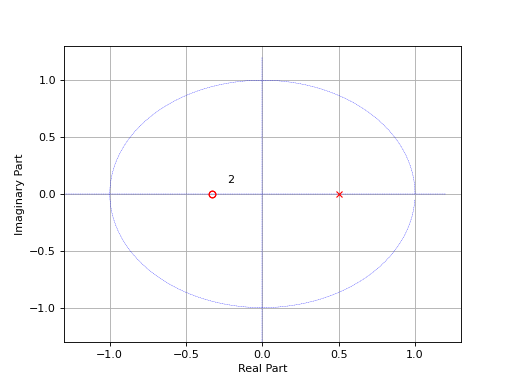

In [17]:
from zplane import zplane
A = [1, -1/2]
B = [1, 2/3, 1/9]
zplane(B,A)

<IPython.core.display.Javascript object>


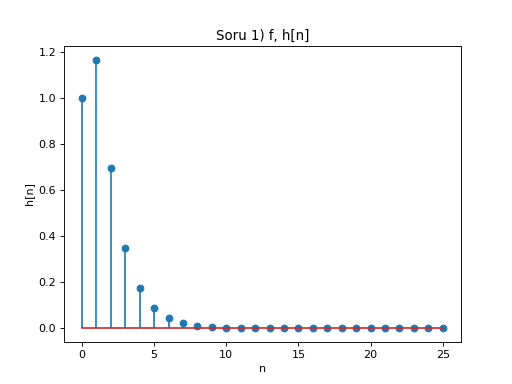

Text(0, 0.5, 'h[n]')

In [18]:
A = [1., -1/2, 0.]
B = [1., 2/3, 1/9]

n, h = sig.dimpulse((B, A, 1), x0=0, n=26)
h = np.squeeze(h)
plt.figure()
plt.stem(n, h, use_line_collection=True)
plt.title('Soru 1) f, h[n]')
plt.xlabel('n')
plt.ylabel('h[n]')

### Hesaplanıldığı gibi değişiklikler yapıldığında -2j ve 2j noktasındaki kutuplar ortadan kalktı.
### Bu kutupların ortadan kalkması ile birlikte sistemin ROC'u |z| > 0.5 oldu.
### ROC, birim çemberi kapsar duruma geldi.
### Nedensellik ve kararlılık koşulları sağlanır duruma geldi.
### Sistemin dürtü cevabı değişiklik gösterdi, sonsuz toplamı sınırlı oldu.

***

# Soru 2)

## $ H(z) = \frac{z^2} {(z+1)(z-1)^2} $

### $ H(z) = \frac{A}{(z+1)} + \frac{B} {(z-1)} +  \frac{C} {(z-1)^2} $

### Hesaplamaları el ile yaptığımda sonuç:
### A = 1/4 , B = 3/4 , C = 1/2

### $ H(z) = \frac{1}{4(z+1)} + \frac{3} {4(z-1)} +  \frac{1} {2(z-1)^2} $

### Ters dönüşümleri alınıp birim dürtü yanıtı bulunur:

### $ h\left[n\right]=\frac{1}{4}\left(-1\right)^{n-1}u\left[n-1\right]+\frac{3}{4}u\left[n-1\right]+\frac{1}{2}\left(n-1\right)u\left[n-1\right]$

<IPython.core.display.Javascript object>


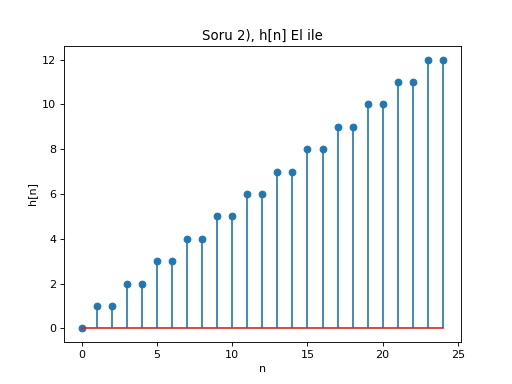

Text(0, 0.5, 'h[n]')

In [19]:
n = np.arange(0, 25, 1)
h = (1/4) * (-1.0)**(n-1) * np.heaviside(n,1) + (3/4) * np.heaviside(n,1) + (1/2) * (n-1) * np.heaviside(n,1)

# Grafik çizdirilmesi
plt.figure()
plt.stem(n, h, use_line_collection=True)
plt.title('Soru 2), h[n] El ile')
plt.xlabel('n')
plt.ylabel('h[n]')

***

## $ H(z) = \frac{z^2} {(z+1)(z-1)^2} =  \frac{1}{z^{-2}\left(z+1\right)\left(z-1\right)^2} = \frac{1}{\left(z-1-z^{-1}+z^{-2}\right)} $

***

### OnCalismaOrnek7 Yöntemiyle

In [20]:
Z = np.array([0, 0])
P = np.array([-1, 1, 1])
B, A = sig.zpk2tf(Z, P, 1)

r, p, k = sig.residuez(B,A)
r, p, k
# r, p, k değerlerine göre H(z) yazılır

(array([0.25, 0.25, 0.5 ]), array([-1.,  1.,  1.]), array([], dtype=float64))

### $ H(z)=\frac{0.25}{1+z^{-1}}+\frac{0.25}{1-z^{-1}}+\frac{0.5}{1-z^{-1}} $

### $ h\left[n\right]=0.25\left(\left(-1\right)^n+3\right) $

<IPython.core.display.Javascript object>


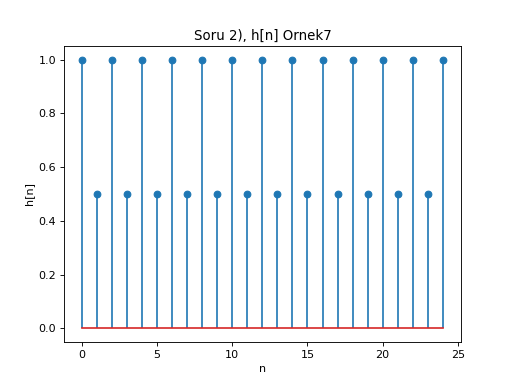

Text(0, 0.5, 'h[n]')

In [21]:
h7 = 0.25 * (((-1)**n) + 3)
h7 = np.squeeze(h7)
plt.figure()
plt.stem(n, h7, use_line_collection=True)
plt.title('Soru 2), h[n] Ornek7')
plt.xlabel('n')
plt.ylabel('h[n]')

***

### OnCalismaOrnek8 Yöntemiyle

<IPython.core.display.Javascript object>


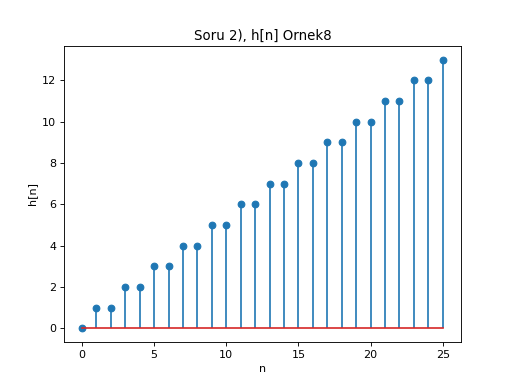

Text(0, 0.5, 'h[n]')

In [22]:
Z = np.array([0, 0])
P = np.array([-1, 1, 1])
B, A = sig.zpk2tf(Z, P, 1)
n, h8 = sig.dimpulse((B, A, 1), x0 = 0, n = 26)
h8 = np.squeeze(h8)
plt.figure()
plt.stem(n, h8, use_line_collection=True)
plt.title('Soru 2), h[n] Ornek8')
plt.xlabel('n')
plt.ylabel('h[n]')

***

### Elde edilen sonuçlar tamamiyle eşleşmemekte. 
### Elle yapılan bulunan ve örnek8 ile bulunan sonuçlar eşit bulundu
### Fakat örnek7 ile elde edilen sonuç bu ikisinden farklı oldu.
### Bu durumun sebebi sistemin bir başlangıç koşulu olmamasıdır.

***

# Soru 3)

## $ H\left(z\right)=\frac{\left(1+3z^{-1}+\frac{11}{6}z^{-2}+\frac{1}{3}z^{-3}\right)}{\left(1+\frac{5}{6}z^{-1}+\frac{1}{6}z^{-2}\right)} $

## $ H\left(z\right)=\frac{\left(1+3z^{-1}+\frac{11}{6}z^{-2}+\frac{1}{3}z^{-3}\right)}{\left(1+\frac{5}{6}z^{-1}+\frac{1}{6}z^{-2}\right)} = \frac{\left(1+3z^{-1}+\frac{11}{6}z^{-2}+\frac{1}{3}z^{-3}\right)}{\left(z+\frac{1}{3}\right)\left(z+\frac{1}{2}\right)} $

***

## $ H\left(z\right)=\frac{\left(1+3z^{-1}+\frac{11}{6}z^{-2}+\frac{1}{3}z^{-3}\right)}{\left(1+\frac{5}{6}z^{-1}+\frac{1}{6}z^{-2}\right)} = \frac{\left(1+3z^{-1}+\frac{11}{6}z^{-2}+\frac{1}{3}z^{-3}\right)}{\left(z+\frac{1}{3}\right)\left(z+\frac{1}{2}\right)} = \frac{\left(6z^3+18z^2+11z+2\right)}{\left(6z^3+5z^2+z\right)} $

### OnCalismaOrnek7 Yöntemiyle

### OnCalismaOrnek8 Yöntemiyle

<IPython.core.display.Javascript object>


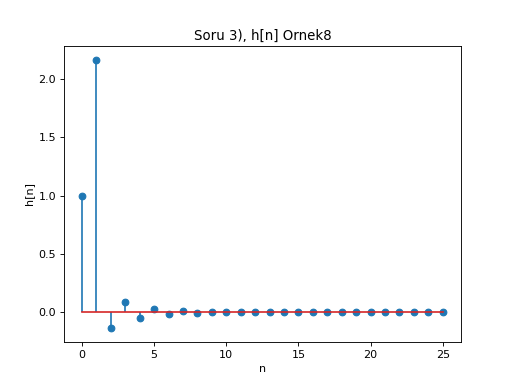

Text(0, 0.5, 'h[n]')

In [23]:
B = [1., 3., 11/6, 1/3]
A = [1., 5/6, 1/6, 0.]
n, h8 = sig.dimpulse((B, A, 1), x0 = 0, n = 26)
h8 = np.squeeze(h8)
plt.figure()
plt.stem(n, h8, use_line_collection=True)
plt.title('Soru 3), h[n] Ornek8')
plt.xlabel('n')
plt.ylabel('h[n]')

***

# Soru 4)

## $ H\left(z\right)=\frac{10-\frac{10}{\sqrt{2}}z^{-1}}{\left(1-e^{\frac{j\pi}{4}}z^{-1}\right)\left(1-e^{\frac{-j\pi}{4}}z^{-1}\right)\left(1-0.5z^{\left(-1\right)}\right)} $

***

### OnCalismaOrnek7 Yöntemiyle

### Sistemine bakarak sıfır noktası $ \frac{1}{\sqrt{2}} $  , kutup noktaları ise $ e^{\frac{j\pi}{4}} , e^{\frac{-j\pi}{4}} $ ve $ 0.5 $ olmaktadır

In [24]:
Z = np.array([1/np.sqrt(2), 0])
P = np.array([np.exp(1j*np.pi/4), np.exp(-1j*np.pi/4), 0.5])
B, A = sig.zpk2tf(Z, P, 1)

r, p, k = sig.residuez(B,A)
r, p, k
# r, p, k değerlerine göre H(z) yazılır

(array([-0.19074357+0.j        ,  0.59537178-0.32561964j,
         0.59537178+0.32561964j]),
 array([0.5       +0.j        , 0.70710678+0.70710678j,
        0.70710678-0.70710678j]),
 array([], dtype=float64))

### r[0] = -0.19074357+0.j 
### r[1] = 0.59537178-0.32561964j
### r[2] = 0.59537178+0.32561964j

### p[0] = 0.5+0.j 
### p[1] = 0.70710678+0.70710678j
### p[2] = 0.70710678-0.70710678j

## $ H(z) = \frac{r\left[0\right]}{1-p\left[0\right]z^{-1}} + \frac{r\left[1\right]}{1-p\left[1\right]z^{-1}} + \frac{r\left[2\right]}{1-p\left[2\right]z^{-1}}$

## $ H(z) = \frac{-0.19}{1-0.5z^{-1}}+\frac{0.595-j0.325}{1-\left(0.707+j0.707\right)z^{-1}}+\frac{0.595+j0.325}{1-\left(0.707-j0.707\right)z^{-1}} $

## $ h\left[n\right]=\left(-0.19\cdot\left(-0.5\right)^n\right)+\left(0.595-j0.325\right)e^{\left(-j2.35n\right)}+\left(0.595+j0.325\right)e^{\left(j2.35n\right)} $

<IPython.core.display.Javascript object>


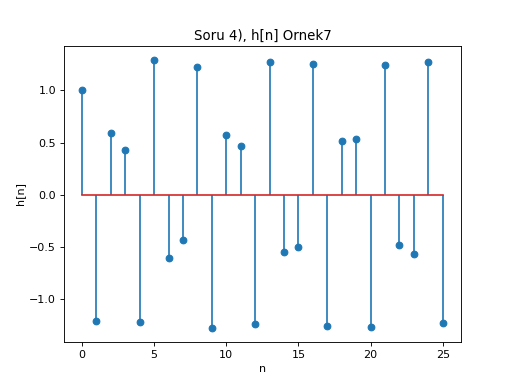

Text(0, 0.5, 'h[n]')

In [25]:
h7 = (-0.19 * (-0.5)**n) + (0.595 - 0.325j) * np.exp(-2.35j*n) + (0.595 + 0.325j) * np.exp(2.35j*n) 
h7 = np.squeeze(h7)
plt.figure()
plt.stem(n, h7.real, use_line_collection=True)
plt.title('Soru 4), h[n] Ornek7')
plt.xlabel('n')
plt.ylabel('h[n]')

### OnCalismaOrnek8 Yöntemiyle

<IPython.core.display.Javascript object>


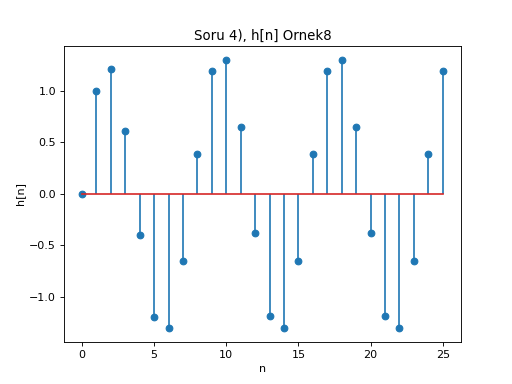

Text(0, 0.5, 'h[n]')

In [26]:
Z = np.array([1/np.sqrt(2), 0])
P = np.array([np.exp(1j*np.pi/4), np.exp(-1j*np.pi/4), 0.5])
B, A = sig.zpk2tf(Z, P, 1)
n, h8 = sig.dimpulse((B, A, 1), x0 = 0, n = 26)
h8 = np.squeeze(h8)
plt.figure()
plt.stem(n, h8, use_line_collection=True)
plt.title('Soru 4), h[n] Ornek8')
plt.xlabel('n')
plt.ylabel('h[n]')

## Not: Görünüşün daha iyi ve okunaklı olması için denklemlerimi http://mathquill.com sitesi ile latex'e çevirerek buraya ekledim.